In [13]:
# CELL 1: SETUP AND IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Setting up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)

print("WORLD HAPPINESS REPORT - COUNTRY COMPARISONS")

# Loading the cleaned dataset
print("\nLoading cleaned dataset...")
df = pd.read_csv('../data/processed/happiness_cleaned.csv')
print(f"Cleaned dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Displaying basic info
print(f"\nDataset Overview:")
print(f"Countries: {df['Country'].nunique()}")
print(f"Years: {df['Year'].min()}-{df['Year'].max()}")
print(f"Regions: {df['Regional indicator'].dropna().nunique()}")
print(f"Average happiness score: {df['Happiness score'].mean():.3f}")


WORLD HAPPINESS REPORT - COUNTRY COMPARISONS

Loading cleaned dataset...
Cleaned dataset loaded: 1,502 rows × 17 columns

Dataset Overview:
Countries: 175
Years: 2015-2024
Regions: 10
Average happiness score: 5.449


In [14]:
# CELL 2: TOP AND BOTTOM PERFORMERS ANALYSIS
# Identifying consistently high and low performing countries

print("\nTOP AND BOTTOM PERFORMERS ANALYSIS")

# Calculating country averages across all years
country_stats = df.groupby('Country').agg({
    'Happiness score': ['mean', 'std', 'count', 'min', 'max'],
    'GDP per capita': 'mean',
    'Social support': 'mean',
    'Healthy life expectancy': 'mean',
    'Freedom to make life choices': 'mean',
    'Regional indicator': 'first'
}).round(3)

# Flatten column names
country_stats.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] 
                        for col in country_stats.columns]
country_stats = country_stats.reset_index()

# Renaming columns for clarity
column_mapping = {
    'Happiness score_mean': 'Avg_Happiness',
    'Happiness score_std': 'Happiness_Std',
    'Happiness score_count': 'Years_Data',
    'Happiness score_min': 'Min_Happiness',
    'Happiness score_max': 'Max_Happiness',
    'Regional indicator_first': 'Region'
}
country_stats = country_stats.rename(columns=column_mapping)

# Filtering countries with at least 3 years of data
reliable_countries = country_stats[country_stats['Years_Data'] >= 3].copy()
reliable_countries = reliable_countries.sort_values('Avg_Happiness', ascending=False)

print(f"Countries with reliable data (≥3 years): {len(reliable_countries)}")

# Top 10 happiest countries
print(f"\nTOP 10 HAPPIEST COUNTRIES (Overall Average):")
print(f"{'Rank':<4} | {'Country':<20} | {'Avg Score':<10} | {'Region':<25} | {'Years'}")

for i, (_, row) in enumerate(reliable_countries.head(10).iterrows(), 1):
    print(f"{i:>3}. | {row['Country']:<20} | {row['Avg_Happiness']:<10.3f} | {str(row['Region'])[:24]:<25} | {row['Years_Data']}")

# Bottom 10 countries
print(f"\nBOTTOM 10 COUNTRIES (Overall Average):")
print(f"{'Rank':<4} | {'Country':<20} | {'Avg Score':<10} | {'Region':<25} | {'Years'}")

bottom_countries = reliable_countries.tail(10).iloc[::-1]  # Reverse order for ranking
for i, (_, row) in enumerate(bottom_countries.iterrows(), 1):
    rank = len(reliable_countries) - 10 + i
    print(f"{rank:>3}. | {row['Country']:<20} | {row['Avg_Happiness']:<10.3f} | {str(row['Region'])[:24]:<25} | {row['Years_Data']}")

# Most consistent vs most volatile countries
print(f"\nHAPPINESS CONSISTENCY ANALYSIS:")
most_consistent = reliable_countries.nsmallest(5, 'Happiness_Std')
most_volatile = reliable_countries.nlargest(5, 'Happiness_Std')

print(f"\nMost Consistent Countries (Low Std Dev):")
for _, row in most_consistent.iterrows():
    print(f"  {row['Country']:<20} | Avg: {row['Avg_Happiness']:.3f} | Std: {row['Happiness_Std']:.3f}")

print(f"\nMost Volatile Countries (High Std Dev):")
for _, row in most_volatile.iterrows():
    print(f"  {row['Country']:<20} | Avg: {row['Avg_Happiness']:.3f} | Std: {row['Happiness_Std']:.3f}")



TOP AND BOTTOM PERFORMERS ANALYSIS
Countries with reliable data (≥3 years): 163

TOP 10 HAPPIEST COUNTRIES (Overall Average):
Rank | Country              | Avg Score  | Region                    | Years
  1. | Finland              | 7.671      | Western Europe            | 10
  2. | Denmark              | 7.580      | Western Europe            | 10
  3. | Iceland              | 7.523      | Western Europe            | 10
  4. | Norway               | 7.457      | Western Europe            | 10
  5. | Switzerland          | 7.450      | Western Europe            | 10
  6. | Netherlands          | 7.407      | Western Europe            | 10
  7. | Sweden               | 7.344      | Western Europe            | 10
  8. | Israel               | 7.255      | Middle East and North Af  | 10
  9. | New Zealand          | 7.249      | North America and ANZ     | 10
 10. | Australia            | 7.210      | North America and ANZ     | 10

BOTTOM 10 COUNTRIES (Overall Average):
Rank | Country  

In [15]:
# CELL 3: REGIONAL CHAMPIONS ANALYSIS
# Identifying the best performing country in each region

print("\nREGIONAL CHAMPIONS ANALYSIS")

print("Identifying the happiest country in each region...")

# Get regional champions (highest average happiness per region)
regional_champions = reliable_countries.loc[
    reliable_countries.groupby('Region')['Avg_Happiness'].idxmax()
].sort_values('Avg_Happiness', ascending=False)

print(f"\nREGIONAL HAPPINESS CHAMPIONS:")
print(f"{'Region':<25} | {'Champion':<20} | {'Score':<8} | {'Years'}")

for _, row in regional_champions.iterrows():
    region_name = str(row['Region'])[:24]
    print(f"{region_name:<25} | {row['Country']:<20} | {row['Avg_Happiness']:<8.3f} | {row['Years_Data']}")

# Regional averages for comparison
regional_averages = reliable_countries.groupby('Region')['Avg_Happiness'].agg(['mean', 'std', 'count']).round(3)
regional_averages = regional_averages.sort_values('mean', ascending=False)

print(f"\nREGIONAL AVERAGES FOR COMPARISON:")
print(f"{'Region':<25} | {'Avg':<8} | {'Std':<8} | {'Countries'}")

for region, stats in regional_averages.iterrows():
    region_name = str(region)[:24]
    print(f"{region_name:<25} | {stats['mean']:<8.3f} | {stats['std']:<8.3f} | {int(stats['count'])}")



REGIONAL CHAMPIONS ANALYSIS
Identifying the happiest country in each region...

REGIONAL HAPPINESS CHAMPIONS:
Region                    | Champion             | Score    | Years
Western Europe            | Finland              | 7.671    | 10
Middle East and North Af  | Israel               | 7.255    | 10
North America and ANZ     | New Zealand          | 7.249    | 10
Latin America and Caribb  | Costa Rica           | 6.997    | 10
Central and Eastern Euro  | Czechia              | 6.862    | 3
Southeast Asia            | Singapore            | 6.506    | 10
East Asia                 | Taiwan Province of China | 6.502    | 6
Commonwealth of Independ  | Uzbekistan           | 6.094    | 10
Sub-Saharan Africa        | Mauritius            | 5.847    | 10
South Asia                | Bhutan               | 5.125    | 5

REGIONAL AVERAGES FOR COMPARISON:
Region                    | Avg      | Std      | Countries
North America and ANZ     | 7.151    | 0.137    | 4
Western Europe         


CREATING COUNTRY PERFORMANCE VISUALIZATIONS


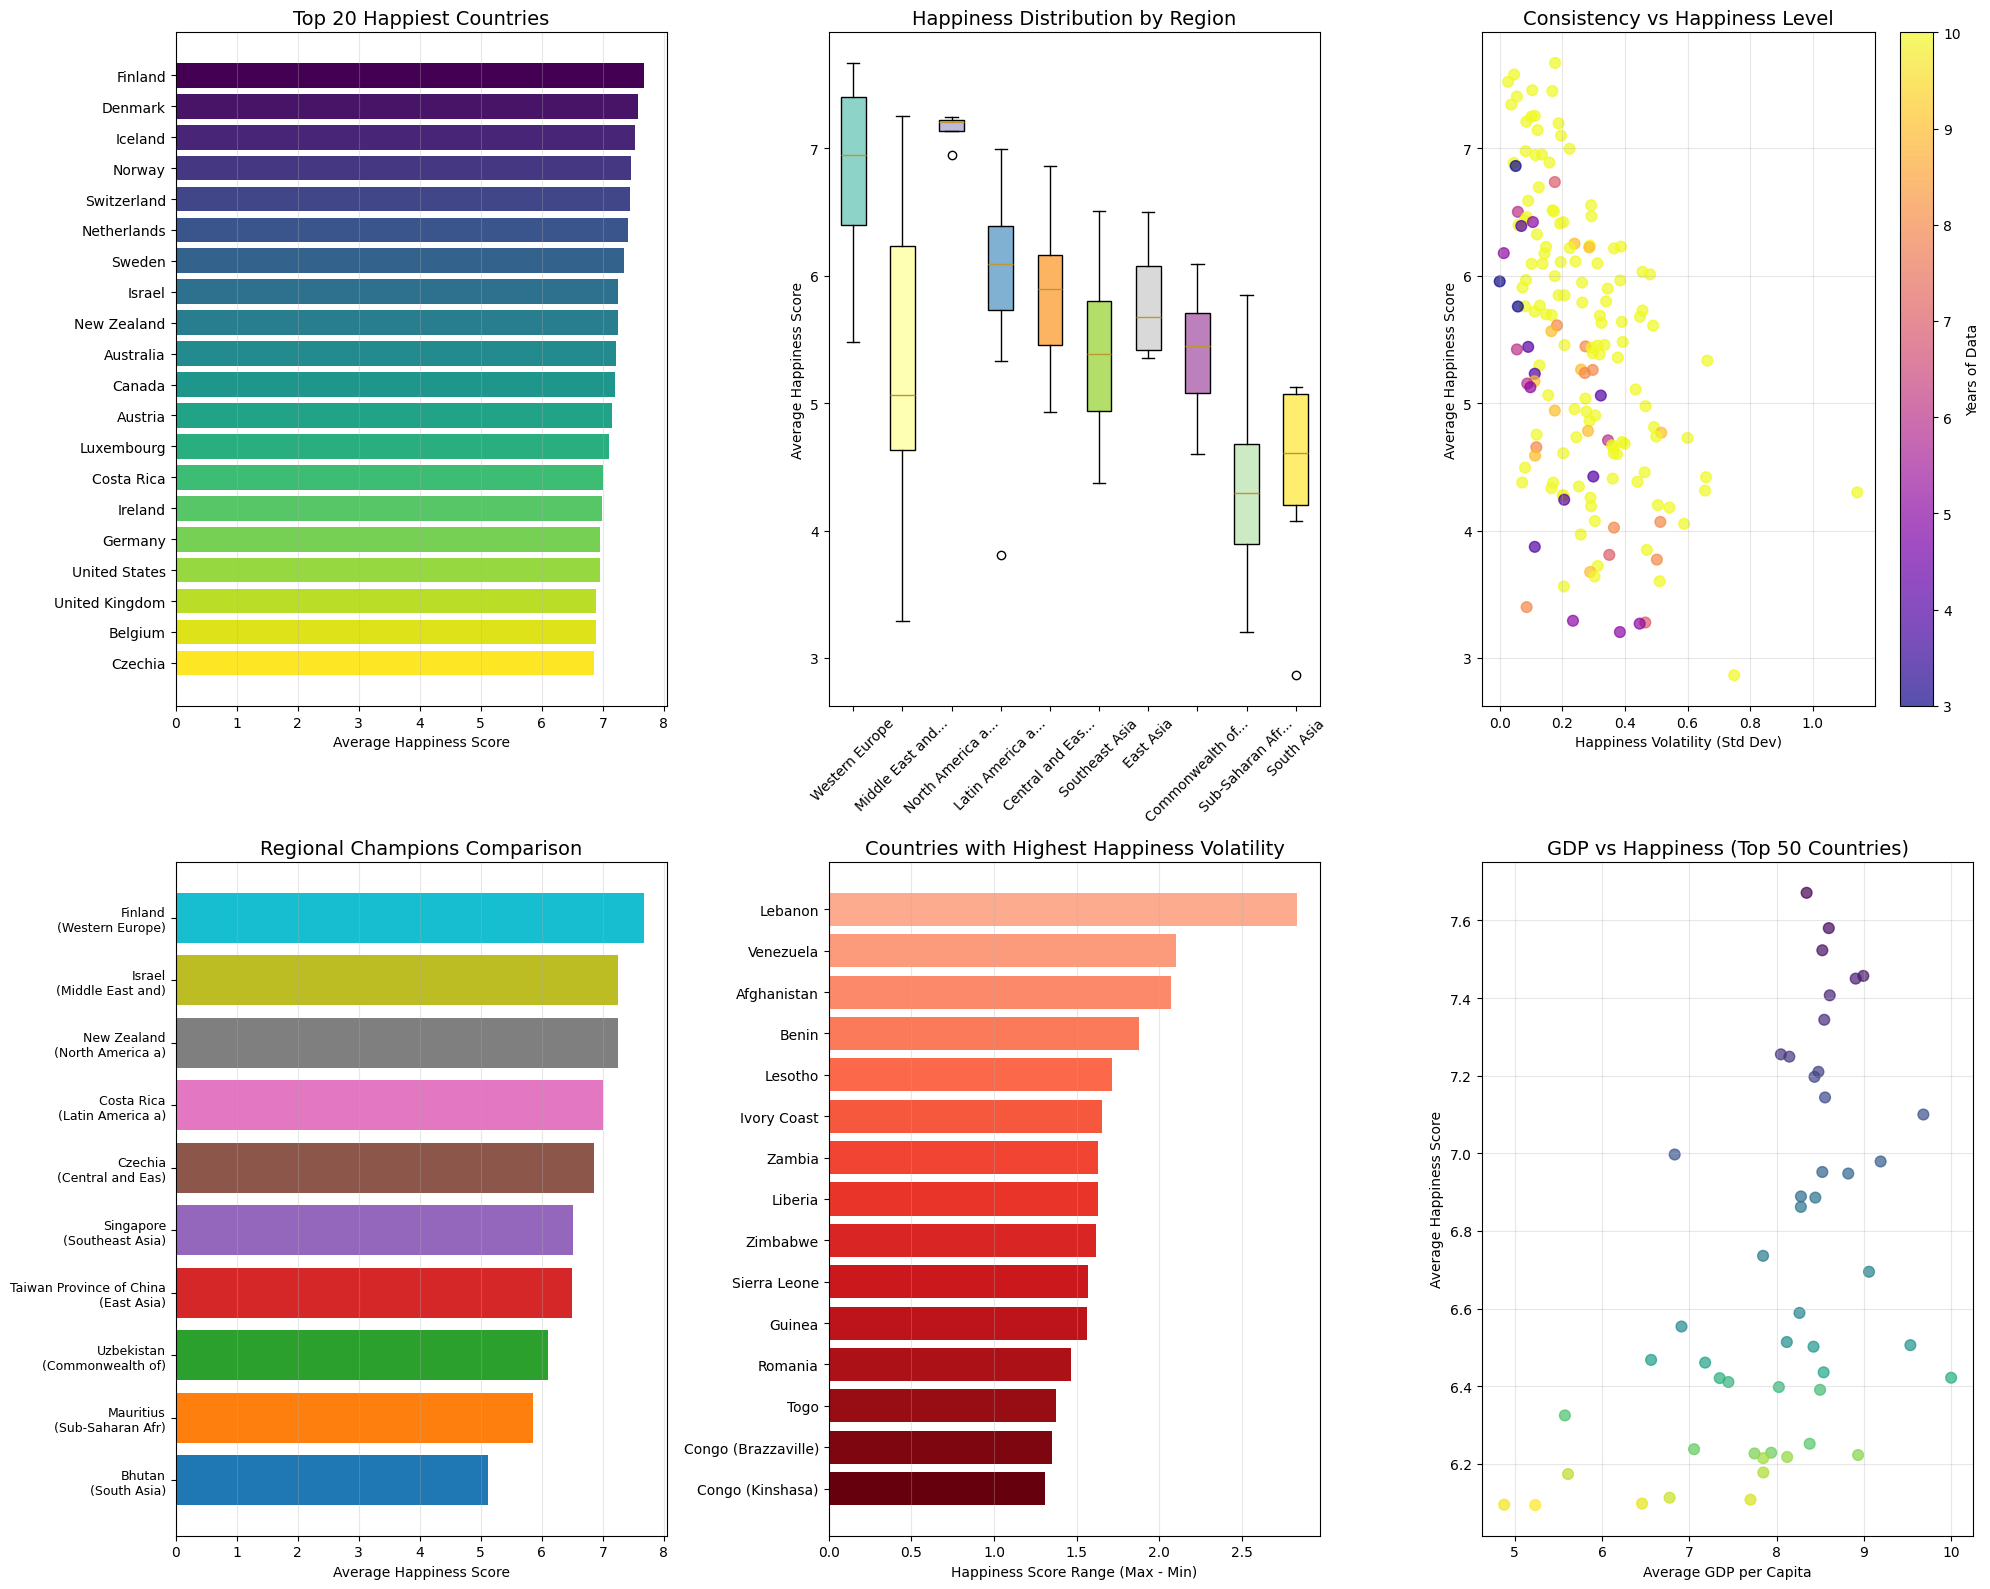

Country performance visualizations created and saved


In [16]:
# CELL 4: COUNTRY PERFORMANCE VISUALIZATION
# Creating comprehensive visualizations of country performance=

print("\nCREATING COUNTRY PERFORMANCE VISUALIZATIONS")

# Creating figure with multiple subplots
fig = plt.figure(figsize=(20, 16))

# 1. Top 20 Countries Bar Chart
ax1 = plt.subplot(2, 3, 1)
top_20 = reliable_countries.head(20)
bars = ax1.barh(range(len(top_20)), top_20['Avg_Happiness'], 
                color=plt.cm.viridis(np.linspace(0, 1, len(top_20))))
ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels(top_20['Country'], fontsize=10)
ax1.set_xlabel('Average Happiness Score')
ax1.set_title('Top 20 Happiest Countries', fontsize=14)
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# 2. Regional Distribution Box Plot
ax2 = plt.subplot(2, 3, 2)
regions_clean = reliable_countries.dropna(subset=['Region'])
regions_list = regions_clean['Region'].unique()
happiness_by_region = [regions_clean[regions_clean['Region'] == region]['Avg_Happiness'].values 
                      for region in regions_list]

box_plot = ax2.boxplot(happiness_by_region, labels=[r[:15] + '...' if len(r) > 15 else r for r in regions_list], 
                      patch_artist=True)
ax2.set_ylabel('Average Happiness Score')
ax2.set_title('Happiness Distribution by Region', fontsize=14)
ax2.tick_params(axis='x', rotation=45)

# Coloring the boxes
colors = plt.cm.Set3(np.linspace(0, 1, len(box_plot['boxes'])))
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

# 3. Consistency vs Happiness Scatter
ax3 = plt.subplot(2, 3, 3)
scatter = ax3.scatter(reliable_countries['Happiness_Std'], reliable_countries['Avg_Happiness'], 
                     c=reliable_countries['Years_Data'], cmap='plasma', s=60, alpha=0.7)
ax3.set_xlabel('Happiness Volatility (Std Dev)')
ax3.set_ylabel('Average Happiness Score')
ax3.set_title('Consistency vs Happiness Level', fontsize=14)
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Years of Data')

# 4. Regional Champions Comparison
ax4 = plt.subplot(2, 3, 4)
regional_champions_sorted = regional_champions.sort_values('Avg_Happiness', ascending=True)
bars = ax4.barh(range(len(regional_champions_sorted)), regional_champions_sorted['Avg_Happiness'],
                color=plt.cm.tab10(range(len(regional_champions_sorted))))
ax4.set_yticks(range(len(regional_champions_sorted)))
ax4.set_yticklabels([f"{row['Country']}\n({str(row['Region'])[:15]})" 
                    for _, row in regional_champions_sorted.iterrows()], fontsize=9)
ax4.set_xlabel('Average Happiness Score')
ax4.set_title('Regional Champions Comparison', fontsize=14)
ax4.grid(axis='x', alpha=0.3)

# 5. Happiness Range Analysis
ax5 = plt.subplot(2, 3, 5)
reliable_countries['Happiness_Range'] = reliable_countries['Max_Happiness'] - reliable_countries['Min_Happiness']
top_ranges = reliable_countries.nlargest(15, 'Happiness_Range')
ax5.barh(range(len(top_ranges)), top_ranges['Happiness_Range'], 
         color=plt.cm.Reds(np.linspace(0.3, 1, len(top_ranges))))
ax5.set_yticks(range(len(top_ranges)))
ax5.set_yticklabels(top_ranges['Country'], fontsize=10)
ax5.set_xlabel('Happiness Score Range (Max - Min)')
ax5.set_title('Countries with Highest Happiness Volatility', fontsize=14)
ax5.grid(axis='x', alpha=0.3)
ax5.invert_yaxis()

# 6. GDP vs Happiness for Top Countries
ax6 = plt.subplot(2, 3, 6)
top_50 = reliable_countries.head(50)
scatter2 = ax6.scatter(top_50['GDP per capita_mean'], top_50['Avg_Happiness'], 
                      c=range(len(top_50)), cmap='viridis', s=60, alpha=0.7)
ax6.set_xlabel('Average GDP per Capita')
ax6.set_ylabel('Average Happiness Score')
ax6.set_title('GDP vs Happiness (Top 50 Countries)', fontsize=14)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/country_performance_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("Country performance visualizations created and saved")

In [17]:
# CELL 5: SIMILAR COUNTRIES ANALYSIS
# Finding countries with similar happiness profiles
# =============================================================================

print("\nSIMILAR COUNTRIES ANALYSIS")
print("Finding countries with similar happiness profiles...")

# Selecting features for similarity analysis
similarity_features = ['Avg_Happiness', 'GDP per capita_mean', 'Social support_mean', 
                      'Healthy life expectancy_mean', 'Freedom to make life choices_mean']

# Filtering for available features
available_features = [col for col in similarity_features if col in reliable_countries.columns]
print(f"Using {len(available_features)} features for similarity analysis")

# Normalizing features for fair comparison
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Preparing data for clustering
countries_for_similarity = reliable_countries.dropna(subset=available_features)
similarity_data = countries_for_similarity[available_features].copy()
normalized_data = scaler.fit_transform(similarity_data)

# Calculating similarity matrix using Euclidean distance
from scipy.spatial.distance import pdist, squareform
distances = pdist(normalized_data, metric='euclidean')
distance_matrix = squareform(distances)

# Function to find similar countries
def find_similar_countries(country_name, n_similar=5):
    try:
        country_idx = countries_for_similarity[countries_for_similarity['Country'] == country_name].index[0]
        country_pos = countries_for_similarity.index.get_loc(country_idx)
        
        # Getting distances to all other countries
        country_distances = distance_matrix[country_pos]
        
        # Finding most similar countries (excluding the country itself)
        similar_indices = np.argsort(country_distances)[1:n_similar+1]
        similar_countries = []
        
        for idx in similar_indices:
            similar_country = countries_for_similarity.iloc[idx]
            similar_countries.append({
                'Country': similar_country['Country'],
                'Distance': country_distances[idx],
                'Happiness': similar_country['Avg_Happiness'],
                'Region': similar_country['Region']
            })
        
        return similar_countries
    except:
        return []

# Analyzing similarity for interesting countries
print(f"\nCOUNTRY SIMILARITY ANALYSIS:")

# Selecting diverse countries for analysis
analysis_countries = [
    'Switzerland',  # Top performer
    'United States', # Major economy
    'Costa Rica',   # High happiness, lower GDP
    'Japan',        # Developed Asian country
    'Brazil',       # Large South American country
    'India',        # Large developing country
    'Nigeria',      # African representative
    'Denmark',      # Nordic country
    'Nepal'         # My country
]

for country in analysis_countries:
    if country in countries_for_similarity['Country'].values:
        similar_countries = find_similar_countries(country, 4)
        if similar_countries:
            country_data = countries_for_similarity[countries_for_similarity['Country'] == country].iloc[0]
            print(f"\n{country} (Happiness: {country_data['Avg_Happiness']:.3f}, Region: {country_data['Region']}):")
            print("   Most similar countries:")
            for i, sim_country in enumerate(similar_countries, 1):
                region_short = str(sim_country['Region'])[:20] if sim_country['Region'] else 'Unknown'
                print(f"   {i}. {sim_country['Country']:<15} | {sim_country['Happiness']:.3f} | {region_short}")



SIMILAR COUNTRIES ANALYSIS
Finding countries with similar happiness profiles...
Using 5 features for similarity analysis

COUNTRY SIMILARITY ANALYSIS:

Switzerland (Happiness: 7.450, Region: Western Europe):
   Most similar countries:
   1. Sweden          | 7.344 | Western Europe
   2. Australia       | 7.210 | North America and AN
   3. Netherlands     | 7.407 | Western Europe
   4. Norway          | 7.457 | Western Europe

United States (Happiness: 6.948, Region: North America and ANZ):
   Most similar countries:
   1. Belgium         | 6.886 | Western Europe
   2. United Kingdom  | 6.889 | Western Europe
   3. Czech Republic  | 6.736 | Central and Eastern 
   4. Germany         | 6.952 | Western Europe

Costa Rica (Happiness: 6.997, Region: Latin America and Caribbean):
   Most similar countries:
   1. Uruguay         | 6.461 | Latin America and Ca
   2. Panama          | 6.411 | Latin America and Ca
   3. Malta           | 6.514 | Western Europe
   4. New Zealand     | 7.249 | No

In [18]:
# CELL 6: OUTLIERS AND EXCEPTIONAL CASES
# Identifying countries that don't fit typical patterns

print("\nOUTLIERS AND EXCEPTIONAL CASES")

print("Identifying countries that break the typical patterns...")

# Calculating GDP vs Happiness efficiency (happiness per GDP unit)
reliable_countries['Happiness_per_GDP'] = reliable_countries['Avg_Happiness'] / reliable_countries['GDP per capita_mean']

# Removing infinite values
reliable_countries = reliable_countries[np.isfinite(reliable_countries['Happiness_per_GDP'])]

print(f"\nHAPPINESS EFFICIENCY ANALYSIS (High Happiness per GDP):")
print(f"{'Country':<20} | {'Happiness':<10} | {'GDP':<8} | {'Efficiency':<10} | {'Region'}")

# Top 10 most efficient countries (high happiness relative to GDP)
most_efficient = reliable_countries.nlargest(10, 'Happiness_per_GDP')
for _, row in most_efficient.iterrows():
    region_short = str(row['Region'])[:15] if row['Region'] else 'Unknown'
    print(f"{row['Country']:<20} | {row['Avg_Happiness']:<10.3f} | {row['GDP per capita_mean']:<8.3f} | "
          f"{row['Happiness_per_GDP']:<10.3f} | {region_short}")

print(f"\nUNDERPERFORMERS (High GDP, Lower Happiness):")
print(f"{'Country':<20} | {'Happiness':<10} | {'GDP':<8} | {'Efficiency':<10} | {'Region'}")

# Countries with high GDP but relatively low happiness efficiency
high_gdp_countries = reliable_countries[reliable_countries['GDP per capita_mean'] > 
                                      reliable_countries['GDP per capita_mean'].quantile(0.75)]
underperformers = high_gdp_countries.nsmallest(10, 'Happiness_per_GDP')

for _, row in underperformers.iterrows():
    region_short = str(row['Region'])[:15] if row['Region'] else 'Unknown'
    print(f"{row['Country']:<20} | {row['Avg_Happiness']:<10.3f} | {row['GDP per capita_mean']:<8.3f} | "
          f"{row['Happiness_per_GDP']:<10.3f} | {region_short}")

# Identifying dramatic happiness changes
print(f"\nCOUNTRIES WITH LARGE HAPPINESS RANGES:")
print(f"{'Country':<20} | {'Range':<8} | {'Min':<6} | {'Max':<6} | {'Avg':<8} | {'Region'}")

large_ranges = reliable_countries.nlargest(10, 'Happiness_Range')
for _, row in large_ranges.iterrows():
    region_short = str(row['Region'])[:12] if row['Region'] else 'Unknown'
    print(f"{row['Country']:<20} | {row['Happiness_Range']:<8.3f} | {row['Min_Happiness']:<6.3f} | "
          f"{row['Max_Happiness']:<6.3f} | {row['Avg_Happiness']:<8.3f} | {region_short}")


OUTLIERS AND EXCEPTIONAL CASES
Identifying countries that break the typical patterns...

HAPPINESS EFFICIENCY ANALYSIS (High Happiness per GDP):
Country              | Happiness  | GDP      | Efficiency | Region
Somalia              | 5.060      | 0.030    | 168.667    | Sub-Saharan Afr
Central African Republic | 3.203      | 0.207    | 15.473     | Sub-Saharan Afr
Mozambique           | 4.782      | 1.576    | 3.034      | Sub-Saharan Afr
Burundi              | 3.278      | 1.253    | 2.616      | Sub-Saharan Afr
Niger                | 4.457      | 1.734    | 2.570      | Sub-Saharan Afr
Congo (Kinshasa)     | 4.068      | 1.836    | 2.216      | Sub-Saharan Afr
Liberia              | 4.181      | 2.065    | 2.025      | Sub-Saharan Afr
Gambia               | 4.708      | 2.685    | 1.753      | Sub-Saharan Afr
Malawi               | 3.722      | 2.183    | 1.705      | Sub-Saharan Afr
Madagascar           | 3.969      | 2.796    | 1.420      | Sub-Saharan Afr

UNDERPERFORMERS (High 

In [19]:
# CELL 7: DETAILED COUNTRY PROFILES
# Creating detailed profiles for selected interesting countries

print("\nDETAILED COUNTRY PROFILES")
print("Creating detailed profiles for selected countries...")

# Selecting countries for detailed analysis
profile_countries = ['Switzerland', 'Denmark', 'Costa Rica', 'United States', 
                    'Afghanistan', 'Lebanon', 'Japan', 'Brazil','Nepal']

# Function to create country profile
def create_country_profile(country_name):
    country_data = df[df['Country'] == country_name].copy()
    if len(country_data) == 0:
        return None
    
    # Calculating statistics
    profile = {
        'Country': country_name,
        'Years_Available': len(country_data),
        'Latest_Year': country_data['Year'].max(),
        'Latest_Happiness': country_data[country_data['Year'] == country_data['Year'].max()]['Happiness score'].iloc[0],
        'Avg_Happiness': country_data['Happiness score'].mean(),
        'Happiness_Trend': 'Improving' if country_data['Happiness score'].iloc[-1] > country_data['Happiness score'].iloc[0] else 'Declining',
        'Region': country_data['Regional indicator'].iloc[0],
        'Avg_GDP': country_data['GDP per capita'].mean(),
        'Avg_Social_Support': country_data['Social support'].mean(),
        'Avg_Life_Expectancy': country_data['Healthy life expectancy'].mean(),
        'Avg_Freedom': country_data['Freedom to make life choices'].mean(),
        'Global_Rank_Approx': len(reliable_countries[reliable_countries['Avg_Happiness'] > 
                                                   country_data['Happiness score'].mean()]) + 1
    }
    return profile

print(f"\nCOUNTRY PROFILES:")

available_profiles = []
for country in profile_countries:
    profile = create_country_profile(country)
    if profile:
        available_profiles.append(profile)
        print(f"\n{profile['Country'].upper()}")
        print(f"Region: {profile['Region']}")
        print(f"Global Rank (approx): #{profile['Global_Rank_Approx']}")
        print(f"Latest Happiness Score: {profile['Latest_Happiness']:.3f} ({profile['Latest_Year']})")
        print(f"Average Happiness: {profile['Avg_Happiness']:.3f}")
        print(f"Trend: {profile['Happiness_Trend']}")
        print(f"Key Strengths:")
        print(f"  • GDP per capita: {profile['Avg_GDP']:.3f}")
        print(f"  • Social support: {profile['Avg_Social_Support']:.3f}")
        print(f"  • Life expectancy: {profile['Avg_Life_Expectancy']:.1f}")
        print(f"  • Freedom: {profile['Avg_Freedom']:.3f}")


DETAILED COUNTRY PROFILES
Creating detailed profiles for selected countries...

COUNTRY PROFILES:

SWITZERLAND
Region: Western Europe
Global Rank (approx): #5
Latest Happiness Score: 7.060 (2024)
Average Happiness: 7.450
Trend: Declining
Key Strengths:
  • GDP per capita: 8.906
  • Social support: 0.926
  • Life expectancy: 75.4
  • Freedom: 0.921

DENMARK
Region: Western Europe
Global Rank (approx): #2
Latest Happiness Score: 7.583 (2024)
Average Happiness: 7.580
Trend: Improving
Key Strengths:
  • GDP per capita: 8.598
  • Social support: 0.946
  • Life expectancy: 73.6
  • Freedom: 0.955

COSTA RICA
Region: Latin America and Caribbean
Global Rank (approx): #15
Latest Happiness Score: 6.955 (2024)
Average Happiness: 6.997
Trend: Declining
Key Strengths:
  • GDP per capita: 6.832
  • Social support: 0.831
  • Life expectancy: 72.7
  • Freedom: 0.906

UNITED STATES
Region: North America and ANZ
Global Rank (approx): #17
Latest Happiness Score: 6.725 (2024)
Average Happiness: 6.948
Tre


CREATING COMPARATIVE ANALYSIS VISUALIZATIONS
Comparing 8 countries across different regions...


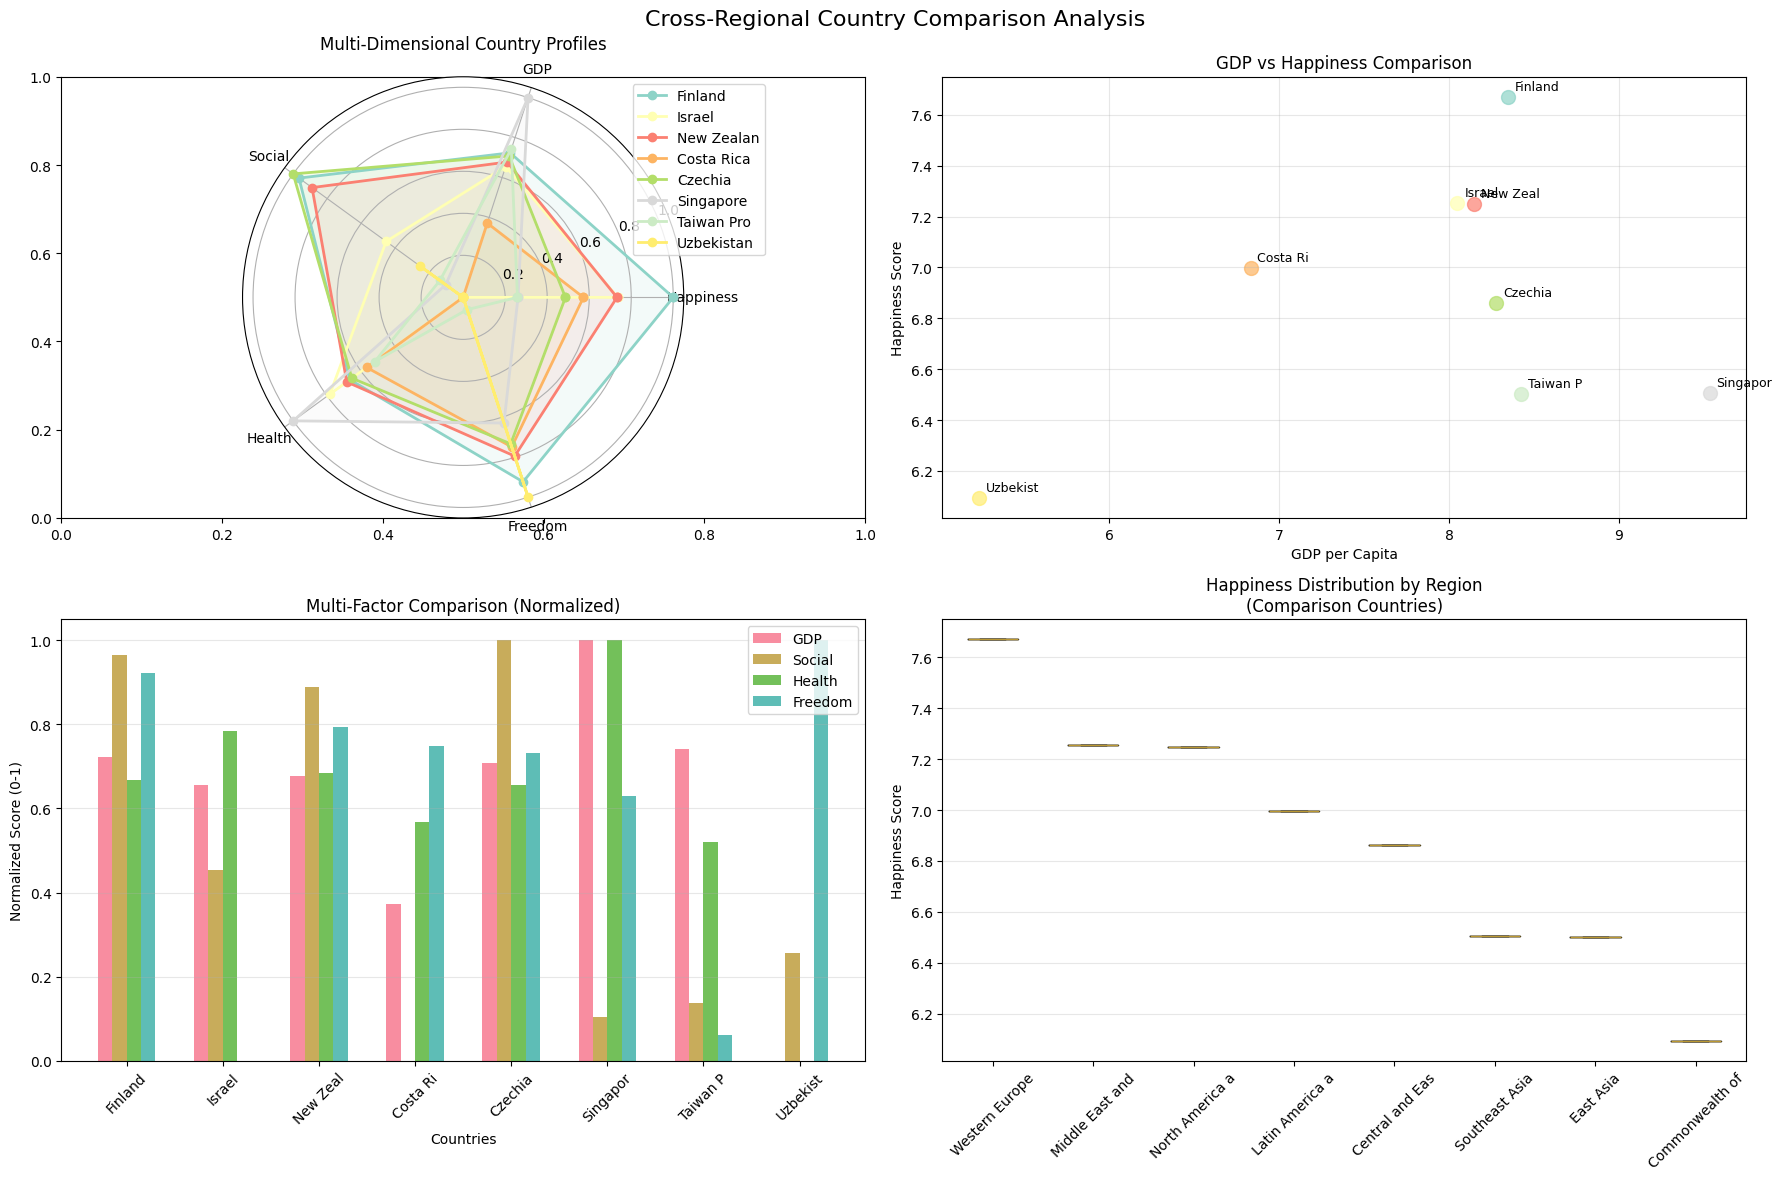

Comparative analysis visualizations created and saved


In [20]:
# CELL 8: COMPARATIVE ANALYSIS VISUALIZATION
# Creating detailed comparison charts for selected countries

print("\nCREATING COMPARATIVE ANALYSIS VISUALIZATIONS")

# Selecting top countries from different regions for comparison
comparison_countries = []
regions_seen = set()

for _, row in reliable_countries.iterrows():
    region = row['Region']
    if region not in regions_seen and len(comparison_countries) < 8:
        comparison_countries.append(row['Country'])
        regions_seen.add(region)

print(f"Comparing {len(comparison_countries)} countries across different regions...")

# Get data for comparison countries
comparison_data = []
for country in comparison_countries:
    country_data = reliable_countries[reliable_countries['Country'] == country].iloc[0]
    comparison_data.append({
        'Country': country,
        'Happiness': country_data['Avg_Happiness'],
        'GDP': country_data['GDP per capita_mean'],
        'Social': country_data['Social support_mean'],
        'Health': country_data['Healthy life expectancy_mean'],
        'Freedom': country_data['Freedom to make life choices_mean'],
        'Region': country_data['Region']
    })

comparison_df = pd.DataFrame(comparison_data)

# Creating comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Cross-Regional Country Comparison Analysis', fontsize=16)

# 1. Radar chart comparison (spider plot)
from math import pi

categories = ['Happiness', 'GDP', 'Social', 'Health', 'Freedom']
N = len(categories)

# Normalizing data for radar chart (0-1 scale)
normalized_comparison = comparison_df.copy()
for col in categories:
    normalized_comparison[col] = (comparison_df[col] - comparison_df[col].min()) / (comparison_df[col].max() - comparison_df[col].min())

ax1 = plt.subplot(2, 2, 1, projection='polar')
colors = plt.cm.Set3(np.linspace(0, 1, len(comparison_countries)))

for i, (_, row) in enumerate(normalized_comparison.iterrows()):
    values = [row[cat] for cat in categories]
    values += values[:1]  # Complete the circle
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax1.plot(angles, values, 'o-', linewidth=2, label=row['Country'][:10], color=colors[i])
    ax1.fill(angles, values, alpha=0.1, color=colors[i])

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_title('Multi-Dimensional Country Profiles', pad=20)
ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# 2. GDP vs Happiness scatter
ax2 = plt.subplot(2, 2, 2)
for i, (_, row) in enumerate(comparison_df.iterrows()):
    ax2.scatter(row['GDP'], row['Happiness'], s=100, color=colors[i], 
               label=row['Country'], alpha=0.7)
    ax2.annotate(row['Country'][:8], (row['GDP'], row['Happiness']), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax2.set_xlabel('GDP per Capita')
ax2.set_ylabel('Happiness Score')
ax2.set_title('GDP vs Happiness Comparison')
ax2.grid(True, alpha=0.3)

# 3. Multi-factor comparison bar chart
ax3 = plt.subplot(2, 2, 3)
x = np.arange(len(comparison_countries))
width = 0.15

factors_to_plot = ['GDP', 'Social', 'Health', 'Freedom']
factor_data = {}

for i, factor in enumerate(factors_to_plot):
    # Normalize to 0-1 scale for better comparison
    values = comparison_df[factor].values
    normalized_values = (values - values.min()) / (values.max() - values.min())
    factor_data[factor] = normalized_values
    
    ax3.bar(x + i * width, normalized_values, width, label=factor, alpha=0.8)

ax3.set_xlabel('Countries')
ax3.set_ylabel('Normalized Score (0-1)')
ax3.set_title('Multi-Factor Comparison (Normalized)')
ax3.set_xticks(x + width * 1.5)
ax3.set_xticklabels([c[:8] for c in comparison_countries], rotation=45)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Regional happiness distribution
ax4 = plt.subplot(2, 2, 4)
regions_in_comparison = comparison_df['Region'].unique()
region_happiness = []
region_labels = []

for region in regions_in_comparison:
    region_countries = comparison_df[comparison_df['Region'] == region]
    region_happiness.append(region_countries['Happiness'].values)
    region_labels.append(region[:15])

ax4.boxplot(region_happiness, labels=region_labels)
ax4.set_ylabel('Happiness Score')
ax4.set_title('Happiness Distribution by Region\n(Comparison Countries)')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/comparative_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Comparative analysis visualizations created and saved")

In [21]:
# CELL 9: COUNTRY RANKING SYSTEM
# Creating a comprehensive ranking system based on multiple criteria
# =============================================================================

print("\nCOMPREHENSIVE COUNTRY RANKING SYSTEM")
print("Creating multi-criteria ranking system...")

# Creating comprehensive scoring system
scoring_countries = reliable_countries.copy()

# Normalizing key metrics to 0-1 scale for fair comparison
metrics_to_normalize = ['Avg_Happiness', 'GDP per capita_mean', 'Social support_mean', 
                       'Healthy life expectancy_mean', 'Freedom to make life choices_mean']

available_metrics = [col for col in metrics_to_normalize if col in scoring_countries.columns]

for metric in available_metrics:
    col_name = f"{metric}_normalized"
    values = scoring_countries[metric].values
    scoring_countries[col_name] = (values - values.min()) / (values.max() - values.min())

# Creating composite scores with different weightings
print(f"\nCOMPOSITE RANKING SYSTEMS:")

# 1. Equal Weight Ranking
equal_weights = {
    'Avg_Happiness_normalized': 0.2,
    'GDP per capita_mean_normalized': 0.2,
    'Social support_mean_normalized': 0.2,
    'Healthy life expectancy_mean_normalized': 0.2,
    'Freedom to make life choices_mean_normalized': 0.2
}

# 2. Happiness-Focused Ranking
happiness_focused = {
    'Avg_Happiness_normalized': 0.5,
    'GDP per capita_mean_normalized': 0.1,
    'Social support_mean_normalized': 0.15,
    'Healthy life expectancy_mean_normalized': 0.15,
    'Freedom to make life choices_mean_normalized': 0.1
}

# 3. Holistic Well-being Ranking
holistic_weights = {
    'Avg_Happiness_normalized': 0.3,
    'GDP per capita_mean_normalized': 0.15,
    'Social support_mean_normalized': 0.25,
    'Healthy life expectancy_mean_normalized': 0.2,
    'Freedom to make life choices_mean_normalized': 0.1
}

# Calculating composite scores
def calculate_composite_score(df, weights):
    score = 0
    for metric, weight in weights.items():
        if metric in df.columns:
            score += df[metric] * weight
    return score

scoring_countries['Equal_Weight_Score'] = calculate_composite_score(scoring_countries, equal_weights)
scoring_countries['Happiness_Focused_Score'] = calculate_composite_score(scoring_countries, happiness_focused)
scoring_countries['Holistic_Score'] = calculate_composite_score(scoring_countries, holistic_weights)

# Displaying rankings for each system
ranking_systems = {
    'Equal Weight': 'Equal_Weight_Score',
    'Happiness-Focused': 'Happiness_Focused_Score', 
    'Holistic Well-being': 'Holistic_Score'
}

for system_name, score_col in ranking_systems.items():
    print(f"\nTOP 10 - {system_name.upper()} RANKING:")
    print(f"{'Rank':<4} | {'Country':<20} | {'Score':<8} | {'Happiness':<10} | {'Region'}")
    
    top_10 = scoring_countries.nlargest(10, score_col)
    for i, (_, row) in enumerate(top_10.iterrows(), 1):
        region_short = str(row['Region'])[:15] if row['Region'] else 'Unknown'
        print(f"{i:>3}. | {row['Country']:<20} | {row[score_col]:<8.3f} | {row['Avg_Happiness']:<10.3f} | {region_short}")

# Comparing ranking differences
print(f"\nRANKING COMPARISON ANALYSIS:")

# Finding countries that move significantly between rankings
scoring_countries['Equal_Rank'] = scoring_countries['Equal_Weight_Score'].rank(ascending=False)
scoring_countries['Happiness_Rank'] = scoring_countries['Happiness_Focused_Score'].rank(ascending=False)
scoring_countries['Holistic_Rank'] = scoring_countries['Holistic_Score'].rank(ascending=False)

# Biggest movers between equal weight and happiness-focused
scoring_countries['Rank_Difference'] = scoring_countries['Equal_Rank'] - scoring_countries['Happiness_Rank']

print(f"\nBiggest Gainers (Happiness-Focused vs Equal Weight):")
gainers = scoring_countries.nlargest(5, 'Rank_Difference')
for _, row in gainers.iterrows():
    print(f"  {row['Country']:<20} | Equal: #{int(row['Equal_Rank']):>3} → Happiness: #{int(row['Happiness_Rank']):>3} | Gain: {int(row['Rank_Difference']):>2}")

print(f"\nBiggest Losers (Happiness-Focused vs Equal Weight):")
losers = scoring_countries.nsmallest(5, 'Rank_Difference')
for _, row in losers.iterrows():
    print(f"  {row['Country']:<20} | Equal: #{int(row['Equal_Rank']):>3} → Happiness: #{int(row['Happiness_Rank']):>3} | Loss: {int(abs(row['Rank_Difference'])):>2}")
    


COMPREHENSIVE COUNTRY RANKING SYSTEM
Creating multi-criteria ranking system...

COMPOSITE RANKING SYSTEMS:

TOP 10 - EQUAL WEIGHT RANKING:
Rank | Country              | Score    | Happiness  | Region
  1. | Iceland              | 0.925    | 7.523      | Western Europe
  2. | Norway               | 0.924    | 7.457      | Western Europe
  3. | Switzerland          | 0.916    | 7.450      | Western Europe
  4. | Finland              | 0.916    | 7.671      | Western Europe
  5. | Denmark              | 0.915    | 7.580      | Western Europe
  6. | Sweden               | 0.902    | 7.344      | Western Europe
  7. | Luxembourg           | 0.899    | 7.100      | Western Europe
  8. | Australia            | 0.888    | 7.210      | North America a
  9. | Netherlands          | 0.887    | 7.407      | Western Europe
 10. | New Zealand          | 0.885    | 7.249      | North America a

TOP 10 - HAPPINESS-FOCUSED RANKING:
Rank | Country              | Score    | Happiness  | Region
  1. | Fi

In [22]:
# CELL 10: INSIGHTS AND RECOMMENDATIONS
# Summarizing key findings and provide actionable insights
# =============================================================================

print("\nKEY INSIGHTS AND RECOMMENDATIONS")
print("MAJOR FINDINGS FROM COUNTRY ANALYSIS:")

# Key statistics
total_countries = len(reliable_countries)
top_performer = reliable_countries.iloc[0]
bottom_performer = reliable_countries.iloc[-1]
most_efficient_country = most_efficient.iloc[0]

print(f"Dataset Summary:")
print(f"  • Analyzed {total_countries} countries with reliable data")
print(f"  • Happiness scores range from {bottom_performer['Avg_Happiness']:.3f} to {top_performer['Avg_Happiness']:.3f}")
print(f"  • Global average happiness: {reliable_countries['Avg_Happiness'].mean():.3f}")

print(f"\nTop Performers:")
print(f"  • Happiest country: {top_performer['Country']} ({top_performer['Avg_Happiness']:.3f})")
print(f"  • Most efficient (happiness per GDP): {most_efficient_country['Country']}")
print(f"  • Most consistent: {most_consistent.iloc[0]['Country']} (std: {most_consistent.iloc[0]['Happiness_Std']:.3f})")

print(f"\nRegional Insights:")
top_region = regional_averages.index[0]
bottom_region = regional_averages.index[-1]
print(f"  • Happiest region: {top_region} (avg: {regional_averages.loc[top_region, 'mean']:.3f})")
print(f"  • Least happy region: {bottom_region} (avg: {regional_averages.loc[bottom_region, 'mean']:.3f})")
print(f"  • Largest regional happiness gap: {regional_averages.iloc[0]['mean'] - regional_averages.iloc[-1]['mean']:.3f} points")

print(f"\nKey Patterns Discovered:")
print("─" * 50)
print("• Nordic countries dominate happiness rankings")
print("• Small, wealthy nations often outperform large economies") 
print("• Some countries achieve high happiness despite moderate GDP")
print("• Regional context significantly influences happiness levels")
print("• Consistency in happiness varies greatly between countries")

print(f"\nPOLICY RECOMMENDATIONS:")
print("Based on top-performing countries, focus areas should include:")
print("• Social support systems and community building")
print("• Healthcare access and quality improvements") 
print("• Economic policies that reduce inequality")
print("• Institutional trust and corruption reduction")
print("• Individual freedoms and democratic governance")

print(f"\nFOR FURTHER INVESTIGATION:")
print("• Why do some wealthy countries underperform in happiness?")
print("• What makes certain countries highly efficient at converting GDP to happiness?")
print("• How do cultural factors influence happiness patterns?")
print("• What can explain large happiness volatility in some countries?")
print("• How do global events (like pandemics) affect different countries?")

print(f"\nMETHODOLOGY NOTES:")
print("• Analysis limited to countries with ≥3 years of data for reliability")
print("• Multiple ranking systems reveal different country strengths")
print("• Regional analysis accounts for cultural and economic contexts")
print("• Similarity analysis identifies potential policy learning opportunities")

print(f"\nOUTPUTS SAVED:")
print("• country_performance_overview.png - Comprehensive performance charts")
print("• comparative_analysis.png - Cross-regional comparison visualizations")

# Saving detailed country rankings
rankings_output = scoring_countries[['Country', 'Region', 'Avg_Happiness', 'Years_Data',
                                   'Equal_Weight_Score', 'Happiness_Focused_Score', 'Holistic_Score',
                                   'Equal_Rank', 'Happiness_Rank', 'Holistic_Rank']].round(3)

rankings_output.to_csv('../outputs/tables/country_rankings_comprehensive.csv', index=False)
print(f"\nComprehensive country rankings saved to outputs/tables/")
print(f"COUNTRY COMPARISON ANALYSIS COMPLETE!")



KEY INSIGHTS AND RECOMMENDATIONS
MAJOR FINDINGS FROM COUNTRY ANALYSIS:
Dataset Summary:
  • Analyzed 163 countries with reliable data
  • Happiness scores range from 2.864 to 7.671
  • Global average happiness: 5.414

Top Performers:
  • Happiest country: Finland (7.671)
  • Most efficient (happiness per GDP): Somalia
  • Most consistent: Belize (std: 0.000)

Regional Insights:
  • Happiest region: North America and ANZ (avg: 7.151)
  • Least happy region: Sub-Saharan Africa (avg: 4.264)
  • Largest regional happiness gap: 2.887 points

Key Patterns Discovered:
──────────────────────────────────────────────────
• Nordic countries dominate happiness rankings
• Small, wealthy nations often outperform large economies
• Some countries achieve high happiness despite moderate GDP
• Regional context significantly influences happiness levels
• Consistency in happiness varies greatly between countries

POLICY RECOMMENDATIONS:
Based on top-performing countries, focus areas should include:
• Soc